In [27]:
# data manipulation
import numpy as np
import pandas as pd
# clustering algo
from sklearn.cluster import KMeans
# pca for visualization
from sklearn.decomposition import PCA
# printing results
import matplotlib.pyplot as plt
# encoding labels
from sklearn.preprocessing import LabelEncoder
# progress bar
from tqdm.notebook import tqdm_notebook

from PIL import Image


from sklearn.manifold import TSNE

In this notebook I'm going to do a cluster analysis of the dataset using the features extracted with elaboration.ipybn

In [2]:
df = pd.read_csv("mfcc_deltamfcc.csv", index_col="path")
df.head()

,label,0,1,2,3,4,5,6,7,8,...,190,191,192,193,194,195,196,197,198,199
path,,,,,,,,,,,,,,,,,,,,,
./Labelled/Bleatings/evt_000_000_000681_210415_150602.wav,Bleatings,0.347820,0.155233,-0.232169,-0.201178,0.206299,-0.812587,0.350786,-0.459605,-0.483644,...,-0.136273,-1.512237,0.313718,-0.025292,0.424550,0.618080,0.493849,-0.480913,0.115574,-0.861757
./Labelled/Bleatings/evt_000_000_000682_210415_150623.wav,Bleatings,0.600532,-0.009147,-0.807296,-0.633419,-0.555820,-0.483127,-0.247325,0.688479,1.102261,...,0.158165,-0.020859,0.099358,0.669381,-0.757209,0.146002,0.395391,0.874418,0.921241,0.427156
./Labelled/Bleatings/evt_000_000_000683_210415_150637.wav,Bleatings,0.146909,0.494060,-0.097277,0.017268,0.327210,0.516250,0.927306,-1.170098,0.393075,...,-0.856356,-0.551477,-0.552312,0.002518,-0.085520,-0.047403,-0.229064,-0.437311,0.156396,-0.163401
./Labelled/Bleatings/evt_000_000_000684_210415_150654.wav,Bleatings,0.805780,0.976582,-0.477301,0.686392,-0.606207,-1.136907,-1.306880,-0.922357,-0.334283,...,0.008805,-1.164836,-0.138124,0.264209,-0.138784,0.276497,-0.528750,0.180946,0.164339,-0.217783
./Labelled/Bleatings/evt_000_000_002434_210416_073853.wav,Bleatings,0.651157,-0.002178,-0.902648,0.265438,-1.208112,-0.640320,-0.343720,1.102376,0.713345,...,0.756449,0.452530,0.357011,0.359743,0.118464,0.318001,0.526162,0.199136,-0.190216,-0.760688


In [28]:
# etract some usefull data for further processing
idx = df.index
targets = df["label"].unique()

In [11]:
# Separating out the features
x = df.iloc[:, 1:].values
np.shape(x)

(827, 200)

In [38]:
# Separating out the target
y = df.loc[:,['label']]
encoder = LabelEncoder()
y = encoder.fit_transform(y)#Scaling the Feature columns
np.shape(y)

(827,)

Lets visualize with PCA the feature set extracted alog their original label

In [31]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
pca.explained_variance_ratio_

array([0.34849991, 0.05491218])

We only carry out about 40% of the variances...

In [48]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2']).set_index(idx)

finalDf = pd.concat([principalDf, pd.DataFrame(y, columns=["label"]).set_index(idx)], axis = 1)
finalDf.head()

,pc1,pc2,label
path,,,
./Labelled/Bleatings/evt_000_000_000681_210415_150602.wav,-1.772103,1.125611,0
./Labelled/Bleatings/evt_000_000_000682_210415_150623.wav,-0.604543,0.784283,0
./Labelled/Bleatings/evt_000_000_000683_210415_150637.wav,-4.574767,1.188736,0
./Labelled/Bleatings/evt_000_000_000684_210415_150654.wav,-2.787314,3.150193,0
./Labelled/Bleatings/evt_000_000_002434_210416_073853.wav,-1.223680,-1.374238,0


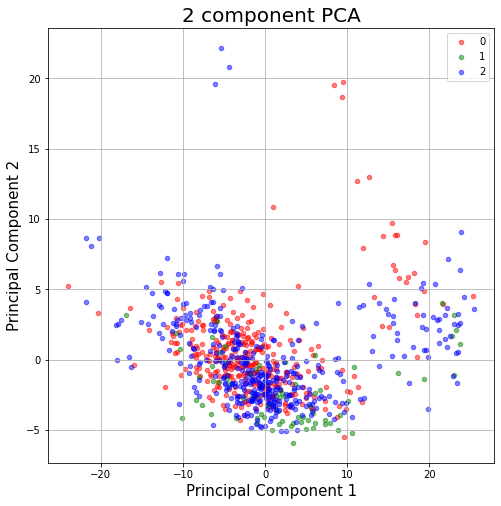

In [60]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

colors = ['r', 'g', 'b']

targets = [0,1,2]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1'], finalDf.loc[indicesToKeep, 'pc2'], c = color, s = 20, alpha=0.5)
ax.legend(targets)
ax.grid()

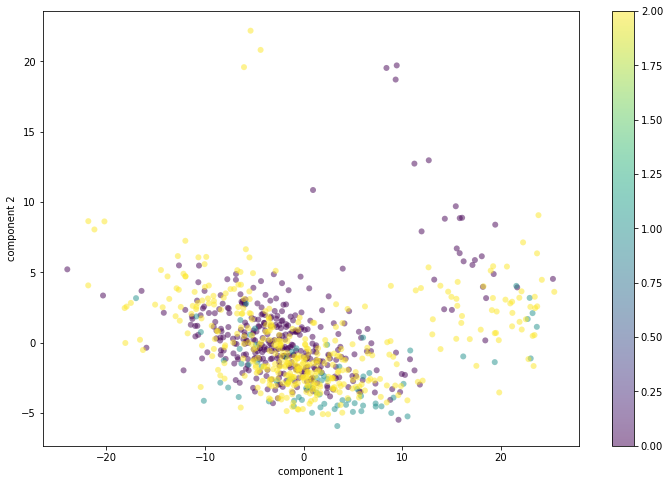

In [58]:
plt.figure(figsize = (12,8))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1],
            c=y, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

# Second

In [5]:
img = Image.open("./img/1.png")
"""
img = img.astype(np.uint8)
img = img / 255
plt.imshow(img,cmap="gray")
"""
type(img)

PIL.PngImagePlugin.PngImageFile

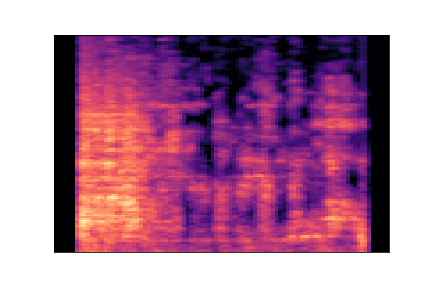

In [15]:
img

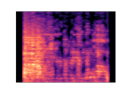

In [18]:
img.resize((128,94))

In [6]:
np.shape(img)

(288, 432, 4)

In [7]:
np.shape(img.convert('L'))

(288, 432)

In [8]:
a = img.convert('L')
np.shape(a)

(288, 432)

In [9]:
a = np.asarray(a)
np.shape(a)

(288, 432)

In [10]:
a

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [11]:
a / 255

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [12]:
np.shape(a.flatten())

(124416,)

In [13]:
meta = pd.read_csv("processed_metadata.csv")
interval = len(meta)
range(interval)

range(0, 6639)

In [21]:
converted_images = pd.DataFrame([])
for num in tqdm_notebook(range(interval)):
    # load and convert to greyscale
    img = Image.open(f"img/{num}.png").resize((128,94)).convert('L')
    # convert to numpy
    img = np.asarray(img)
    # normalize to 
    img = img / 255
    
    spectogram = pd.Series(img.flatten(),name=num)
    converted_images = converted_images.append(spectogram)

  0%|          | 0/6639 [00:00<?, ?it/s]

In [22]:
pca = PCA(n_components=2)
principalComponents2 = pca.fit_transform(converted_images)
pca.explained_variance_ratio_

array([0.34939565, 0.14249454])

In [25]:
# Separating out the target
y = meta['label']
encoder = LabelEncoder()
y = encoder.fit_transform(y)#Scaling the Feature columns
np.shape(y)

(6639,)

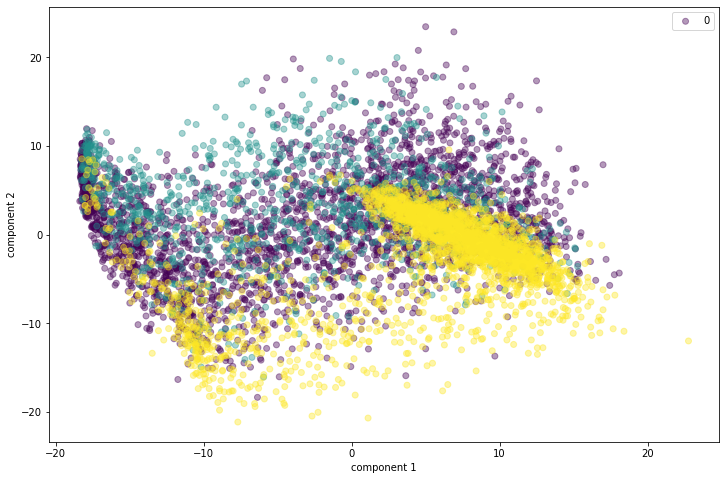

In [26]:
plt.figure(figsize = (12,8))
plt.scatter(principalComponents2[:, 0], principalComponents2[:, 1], c=y, alpha=0.4)
plt.xlabel('component 1')
plt.ylabel('component 2')
targets = [0,1,2]
plt.legend(targets)

In [32]:
a = TSNE(n_components=2).fit_transform(converted_images)

In [33]:
np.shape(a)

(6639, 2)

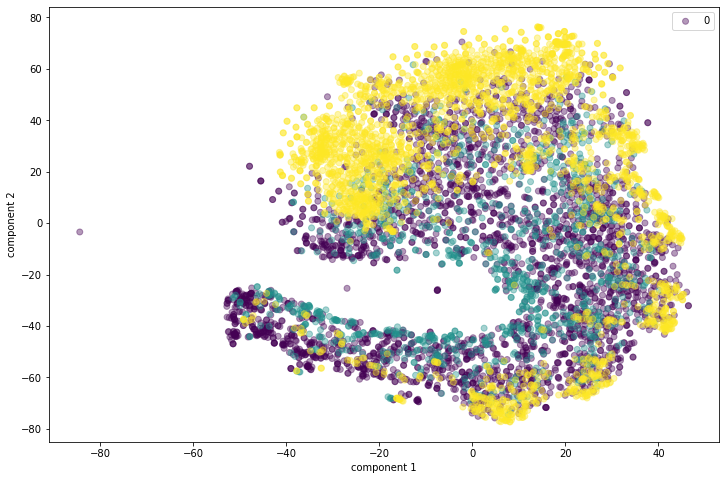

In [34]:
plt.figure(figsize = (12,8))
plt.scatter(a[:, 0], a[:, 1], c=y, alpha=0.4)
plt.xlabel('component 1')
plt.ylabel('component 2')
targets = [0,1,2]
plt.legend(targets)

# Terzo

In [36]:
import pickle

In [37]:
logmelspectrograms = pickle.load(open("logmelspectrograms_data.p", "rb" ))

In [38]:
np.shape(logmelspectrograms)

(6639, 128, 94)

In [39]:
l1 = [sample.flatten() for sample in logmelspectrograms]

In [27]:
np.shape(l1)

(6639, 12032)

In [28]:
l1

[array([-80., -80., -80., ..., -80., -80., -80.]),
 array([-80., -80., -80., ..., -80., -80., -80.]),
 array([-80., -80., -80., ..., -80., -80., -80.]),
 array([-80., -80., -80., ..., -80., -80., -80.]),
 array([-24.97993583, -24.04118068, -29.69289251, ..., -55.29302414,
        -55.23913876, -54.20174696]),
 array([-80., -80., -80., ..., -80., -80., -80.]),
 array([-80., -80., -80., ..., -80., -80., -80.]),
 array([-80., -80., -80., ..., -80., -80., -80.]),
 array([-80.        , -80.        , -80.        , ..., -72.70306363,
        -80.        , -80.        ]),
 array([-80., -80., -80., ..., -80., -80., -80.]),
 array([-80., -80., -80., ..., -80., -80., -80.]),
 array([-80., -80., -80., ..., -80., -80., -80.]),
 array([-43.05622795, -28.79156978, -24.74611036, ..., -56.12619779,
        -55.04779594, -61.5490752 ]),
 array([-80., -80., -80., ..., -80., -80., -80.]),
 array([-80., -80., -80., ..., -80., -80., -80.]),
 array([-33.42156812, -36.58927966, -37.28496824, ..., -56.03244053

In [29]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(l1)
pca.explained_variance_ratio_

array([0.45506399, 0.12820909])

In [30]:
df = pd.read_csv("processed_metadata.csv")
df.head()

,path,segment,label,samplingrate,ms
0,./Labelled/Bleatings/evt_000_000_000681_210415...,0,Bleatings,16000,3000.0
1,./Labelled/Bleatings/evt_000_000_000681_210415...,1,Bleatings,16000,3000.0
2,./Labelled/Bleatings/evt_000_000_000681_210415...,2,Bleatings,16000,3000.0
3,./Labelled/Bleatings/evt_000_000_000681_210415...,3,Bleatings,16000,3000.0
4,./Labelled/Bleatings/evt_000_000_000681_210415...,4,Bleatings,16000,3000.0


In [23]:
# Separating out the target
y = df['label']
encoder = LabelEncoder()
y = encoder.fit_transform(y)#Scaling the Feature columns
np.shape(y)

(827,)

In [33]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

finalDf = pd.concat([principalDf, pd.DataFrame(y, columns=["label"])], axis = 1)
finalDf.head()

,pc1,pc2,label
0,-1354.275011,-637.924803,0
1,-11.477662,550.621095,0
2,-900.389908,-161.290428,0
3,-1992.586973,-523.066733,0
4,1173.008483,226.856797,0


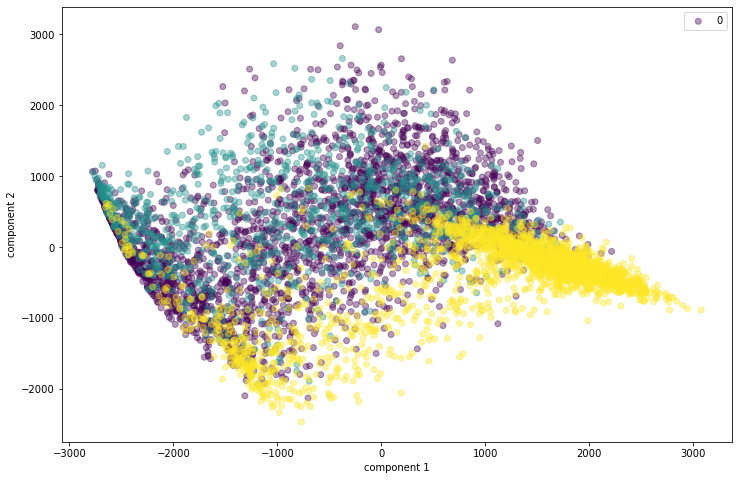

In [44]:
plt.figure(figsize = (12,8))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=y, alpha=0.)
plt.xlabel('component 1')
plt.ylabel('component 2')
targets = [0,1,2]
plt.legend(targets)

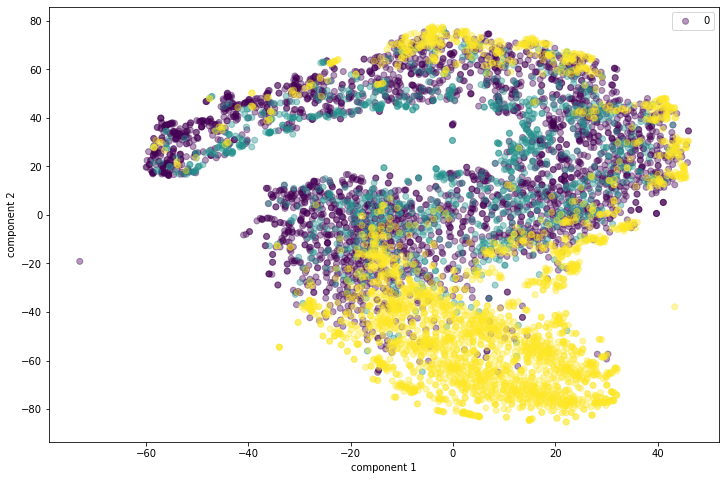

In [45]:
a = TSNE(n_components=2).fit_transform(l1)

plt.figure(figsize = (12,8))
plt.scatter(a[:, 0], a[:, 1], c=y, alpha=0.4)
plt.xlabel('component 1')
plt.ylabel('component 2')
targets = [0,1,2]
plt.legend(targets)

# Quarto

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()

In [43]:
l2 = scaler.fit_transform(l1)

In [57]:
l2

array([[-0.82245881, -0.88775835, -0.94483267, ..., -0.8592019 ,
        -0.82825531, -0.7832444 ],
       [-0.82245881, -0.88775835, -0.94483267, ..., -0.8592019 ,
        -0.82825531, -0.7832444 ],
       [-0.82245881, -0.88775835, -0.94483267, ..., -0.8592019 ,
        -0.82825531, -0.7832444 ],
       ...,
       [ 1.2608832 ,  1.27689105,  1.22149891, ...,  0.0512099 ,
         0.0933642 ,  0.15927723],
       [ 1.3799806 ,  1.32891868,  1.30333529, ...,  0.23263818,
         0.78197308,  1.07377092],
       [-0.82245881, -0.88775835, -0.94483267, ..., -0.8592019 ,
        -0.82825531, -0.7832444 ]])

In [59]:
pca = PCA(n_components=2)
principalComponents2 = pca.fit_transform(l2)
pca.explained_variance_ratio_

array([0.39923501, 0.1461488 ])

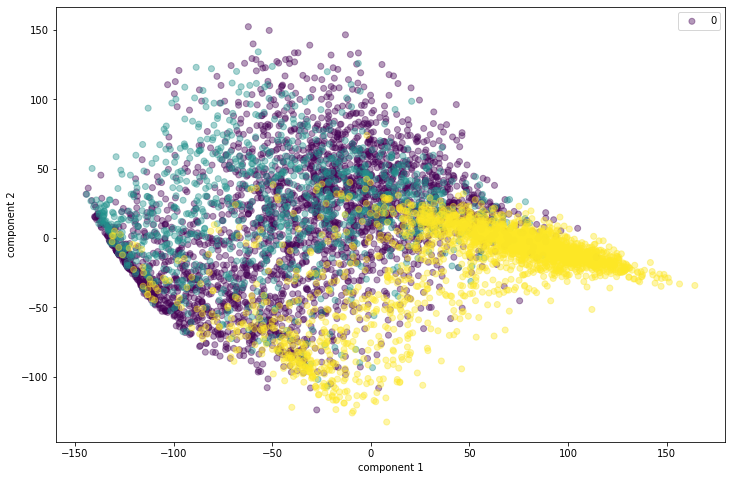

In [60]:
plt.figure(figsize = (12,8))
plt.scatter(principalComponents2[:, 0], principalComponents2[:, 1], c=y, alpha=0.4)
plt.xlabel('component 1')
plt.ylabel('component 2')
targets = [0,1,2]
plt.legend(targets)

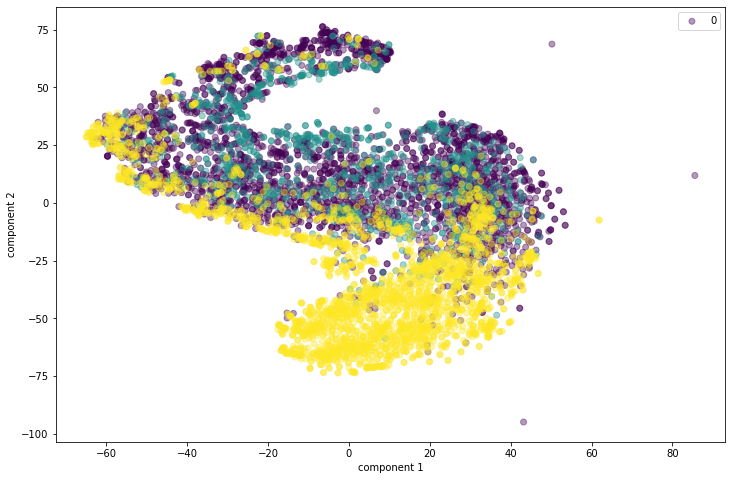

In [44]:
a = TSNE(n_components=2).fit_transform(l2)

plt.figure(figsize = (12,8))
plt.scatter(a[:, 0], a[:, 1], c=y, alpha=0.4)
plt.xlabel('component 1')
plt.ylabel('component 2')
targets = [0,1,2]
plt.legend(targets)

# quinta

In [47]:
pca = PCA(n_components=50)
principalComponents3 = pca.fit_transform(l2)
np.sum(pca.explained_variance_ratio_)

0.9037293560286231

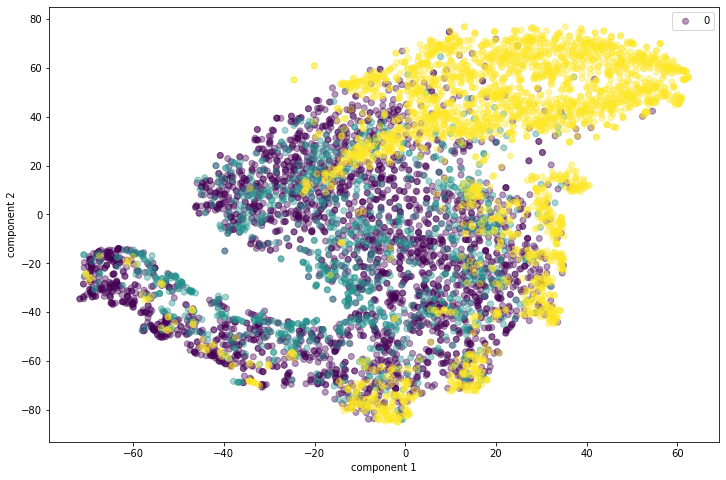

In [48]:
a = TSNE(n_components=2).fit_transform(principalComponents3)

plt.figure(figsize = (12,8))
plt.scatter(a[:, 0], a[:, 1], c=y, alpha=0.4)
plt.xlabel('component 1')
plt.ylabel('component 2')
targets = [0,1,2]
plt.legend(targets)